In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# User inputs
file_dir  = '/Users/rmueller/Documents/UBC/MIDOSS/Data/DeptOfEcology/'
file_name = 'MuellerTrans4-30-20.xlsx'

In [4]:
df = pd.read_excel(f'{file_dir}{file_name}',sheet_name='Vessel Oil Transfer', usecols="E,H,P,Q,R")

### Extract data for oil cargo transferred to vessels for marine export approximation

In [5]:
# Get all cargo fuel transfers
bool_cargo = df['TransferType']=='Cargo'
cargo_data = df[bool_cargo]

In [26]:
oil_traffic = {}
oil_traffic['destination']={}

for reciever in cargo_data.Receiver:
    # create a list of all recieving entities
    if reciever not in oil_traffic['destination']:
        oil_traffic['destination'][f'{reciever}'] = 0
    # create a list of all refinery destinations
    #if receiver.str.contains('Refinery')
#oil_traffic['destination']

In [19]:
oil_traffic['destination']['name']

'BP Cherry Point Refinery'

### Evaulate marine oil export

In [46]:
# remove cargo fuel transfers to land-based entity in order to isolate ship traffic data
oil_traffic['cargo'] = {}
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Refinery')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('Terminal')]
cargo_data = cargo_data[~cargo_data.Receiver.str.contains('NASWI')]

# cargo_data is no longer indexed chronologically after removing 'Refinery', 'Terminal' and 'NASWI' entries
# need to re-set indexing in order to use row-index as data_frame index
cargo_data.reset_index(drop=True, inplace=True)
[nrows,ncols] = cargo_data.shape

# introduce dictionary entries for fuel volume export
oil_traffic['cargo']['atb_volume_export'] = 0
oil_traffic['cargo']['atb_carrier']={}
oil_traffic['cargo']['barge_volume_export'] = 0
oil_traffic['cargo']['other_export'] = 0

# total up volume of oil transferred onto ATB BARGES, non-ATB barges, and other vessels
for rows in range(nrows):
    if 'ATB' in cargo_data.Receiver[rows]:
        oil_traffic['cargo']['atb_volume_export'] = oil_traffic['cargo']['atb_volume_export'] + cargo_data.TransferQtyInGallon[rows]
        #display(cargo_data.Receiver[rows])
        #if cargo_data.Receiver[rows] not in oil_traffic['cargo']['atb_carrier']:
        #    oil_traffic['cargo']['atb_carrier'][f'{oil_traffic['cargo']['atb_carrier']}']=[f'{oil_traffic['cargo']['atb_carrier']}']
    elif 'BARGE' in cargo_data.Receiver[rows] or 'Barge' in cargo_data.Receiver[rows] or 'PB' in cargo_data.Receiver[rows] or 'YON' in cargo_data.Receiver[rows] or 'DLB' in cargo_data.Receiver[rows]:  # and not 'ATB' in cargo_data.Receiver[rows]:  
        oil_traffic['cargo']['barge_volume_export'] = oil_traffic['cargo']['barge_volume_export'] + cargo_data.TransferQtyInGallon[rows]
        #display(cargo_data.Receiver[rows])
    else:
        oil_traffic['cargo']['other_export'] = oil_traffic['cargo']['other_export'] + cargo_data.TransferQtyInGallon[rows]
        #display(cargo_data.Receiver[rows])

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'CARTAGENA'

'PROFESSOR KAREN ANN BROWN'

'NEW ENDEAVOR'

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'COMMENCEMENT BAY'

'WEBB MOFFETT'

'BETSY ARNTZ'

'HMS 2000'

'EXPLORER'

'GAN-TRIUMPH'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DOTTIE'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'TORM EMILIE'

'PELICAN STATE'

'PELICAN STATE'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'HMS 2000'

'HMS 2000'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'PROFESSOR KAREN ANN BROWN'

'U.S. Oil & Refining'

'GLOBAL PILOT'

'GLOBAL PILOT'

'DUGAN PEARSALL'

'SHAUNA KAY'

'HMS 26-1'

'SILVER CARLA'

'NEW DAWN'

'NEW ENDEAVOR'

'EVERGREEN STATE'

'EVERGREEN STATE'

'EVERGREEN STATE'

'EVERGREEN STATE'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'TORM EMILIE'

'NORD SUPREME'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'WEBB MOFFETT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'SHAUNA KAY'

'GLOBAL PILOT'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'BETSY ARNTZ'

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'SILVER CARLA'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'TRI-CITIES VOYAGER'

'COMMENCEMENT BAY'

'NATHAN SCHMIDT'

'GLOBAL PILOT'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'EVERGREEN STATE'

'EVERGREEN STATE'

'EVERGREEN STATE'

'EVERGREEN STATE'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'MADHA SILVER'

'NEW FRONTIER'

'WEBB MOFFETT'

'U.S. Oil & Refining'

'NEW FRONTIER'

'SHAUNA KAY'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'NAVSUP Manchester'

'NEW ENDEAVOR'

'PELICAN STATE'

'PELICAN STATE'

'EMPIRE STATE'

'SHAUNA KAY'

'SHAUNA KAY'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'REG Grays Harbor, LLC'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'MADHA SILVER'

'ANTRIL S'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'BETSY ARNTZ'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'NEW DAWN'

'SASANOA'

'HMS 2604'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'DUGAN PEARSALL'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'HMS 2000'

'HMS 2000'

'TIDEWATER'

'DRAKES BAY'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'HMS 2000'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 26-1'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'GLOBAL PILOT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'HMS 2604'

'SEASPAN 827'

'PTI HERCULES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'CHS PRIMELAND'

'NEW ENDEAVOR'

'HMS 2000'

'HELLESPONT PROMISE'

'SHAUNA KAY'

'SHAUNA KAY'

'TRICITIES VOYAGER'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'HMS 2000'

'SHAUNA KAY'

'BETSY ARNTZ'

'NAVSUP Manchester'

'SHAUNA KAY'

'DOTTIE'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'PROFESSOR KAREN ANN BROWN'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'NEW DAWN'

'WEBB MOFFETT'

'DUGAN PEARSALL'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'NATHAN SCHMIDT'

'HMS 2604'

'HMS 2604'

'HMS 2000'

'CARTAGENA'

'CARTAGENA'

'CARTAGENA'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'REG Grays Harbor, LLC'

'HMS 2000'

'DRAKES BAY'

'OLYMPIC SPIRIT'

'CAPELLA'

'PELICAN STATE'

'PELICAN STATE'

'NEW ENDEAVOR'

'OVERSEAS BOSTON'

'Alon Asphalt Company (Paramount Petroleum)'

'OLYMPIC SPIRIT'

'NATHAN SCHMIDT'

'HMS 2000'

'HMS 2000'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'DUGAN PEARSALL'

'DOTTIE'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'HMS 2604'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'HMS 2000'

'GLOBAL PILOT'

'HMS 2604'

'EXPLORER'

'DOTTIE'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'ST. ELIAS'

'EXPLORER'

'NEW DAWN'

'OLYMPIC SPIRIT'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'Alon Asphalt Company (Paramount Petroleum)'

'CTG MAGNESIUM'

'CTG MAGNESIUM'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'SEASPAN 827'

'PROSPECTOR'

'HMS 26-1'

'BETSY ARNTZ'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'DOTTIE'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'ATLANTIC MUSE'

'NATHAN SCHMIDT'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'DOTTIE'

'ANTRIL S'

'OVERSEAS MARTINEZ'

'WEBB MOFFETT'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'NEW ENDEAVOR'

'Alon Asphalt Company (Paramount Petroleum)'

'ATLANTIC MUSE'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'BETSY ARNTZ'

'HMS 2000'

'HMS 2000'

'WEBB MOFFETT'

'OLYMPIC SPIRIT'

'NATHAN SCHMIDT'

'PELICAN STATE'

'PELICAN STATE'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'TORM HELVIG'

'NATHAN SCHMIDT'

'HMS 26-1'

'GLOBAL PILOT'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'HMS 2000'

'DOTTIE'

'DOTTIE'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'EVERGREEN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'SEASPAN 827'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'TRI-CITIES VOYAGER'

'TRI-CITIES VOYAGER'

'TRI-CITIES VOYAGER'

'U.S. Oil & Refining'

'HMS 2000'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'WEBB MOFFETT'

'GLOBAL PILOT'

'PROSPECTOR'

'DRAKES BAY'

'BETSY ARNTZ'

'ZB335'

'Alon Asphalt Company (Paramount Petroleum)'

'WEBB MOFFETT'

'NATHAN SCHMIDT'

'NEW ENDEAVOR'

'USS Nimitz'

'DUGAN PEARSALL'

'BETSY ARNTZ'

'DOTTIE'

'Nustar Energy Tacoma'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'HMS 26-1'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'NEW DAWN'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'OVERSEAS MARTINEZ'

'OVERSEAS MARTINEZ'

'OVERSEAS MARTINEZ'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'HMS 2000'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NAVE SEXTANS'

'NAVE SEXTANS'

'GLOBAL PILOT'

'PELICAN STATE'

'DR. BONNIE W. RAMSEY'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'HMS 2000'

'NEW ENDEAVOR'

'HMS 2604'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'GLOBAL PILOT'

'BETSY ARNTZ'

'U.S. Oil & Refining'

'ANTRIL S'

'ANTRIL S'

'HMS 2604'

'EXPLORER'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'DR. BONNIE W. RAMSEY'

'ANTRIL S'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'GLOBAL SEATTLE'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'Alon Asphalt Company (Paramount Petroleum)'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'SEASPAN 827'

'WEBB MOFFETT'

'WEBB MOFFETT'

'PROSPECTOR'

'HMS 2000'

'DUGAN PEARSALL'

'GLOBAL SEATTLE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'BETSY ARNTZ'

'BETSY ARNTZ'

'BETSY ARNTZ'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'NORD SUPREME'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'BOCHEM LONDON'

'BOCHEM LONDON'

'PROFESSOR KAREN ANN BROWN'

'NORD SUPREME'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'GLOBAL PILOT'

'NAVSUP Manchester'

'GLOBAL PILOT'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'HMS 2000'

'Alon Point Wells'

'SHAUNA KAY'

'ORIENT CHALLENGE'

'ORIENT CHALLENGE'

'ORIENT CHALLENGE'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'DOTTIE'

'GLOBAL SEATTLE'

'DUGAN PEARSALL'

'GLOBAL PILOT'

'BETSY ARNTZ'

'OLYMPIC SPIRIT'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'HMS 2000'

'WEBB MOFFETT'

'TRI-CITIES VOYAGER'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'Nustar Energy Vancouver'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'DRAKES BAY'

'GLOBAL PILOT'

'SHAUNA KAY'

'USN SWOB 25'

'NORD SUPREME'

'HMS 2604'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'OLYMPIC SPIRIT'

'AMERICAN ENDURANCE'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'WEBB MOFFETT'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'DUGAN PEARSALL'

'HMS 26-1'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'GLOBAL PILOT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'DOTTIE'

'AMERICAN FREEDOM'

'NAVSUP Manchester'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'SHAUNA KAY'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'EMPIRE STATE'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'CAPELLA'

'BETSY ARNTZ'

'NEW DAWN'

'U.S. Oil & Refining'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'PELICAN STATE'

'DR. BONNIE W. RAMSEY'

'KIRKEHOLMEN'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NAVSUP Manchester'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'NAVE SEXTANS'

'WEBB MOFFETT'

'OLYMPIC SPIRIT'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'HMS 2000'

'DUGAN PEARSALL'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'DRAKES BAY'

'WEBB MOFFETT'

'CASCADES'

'CASCADES'

'DOTTIE'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'OLYMPIC SPIRIT'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'DAGWOOD'

'DAGWOOD'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NATHAN SCHMIDT'

'TRI-CITIES VOYAGER'

'NEW ENDEAVOR'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'SEASPAN 827'

'GLOBAL PILOT'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'DOTTIE'

'SHAUNA KAY'

'ANTRIL S'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'WEBB MOFFETT'

'WEBB MOFFETT'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'HMS 2000'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'GLOBAL PILOT'

'GLOBAL PILOT'

'HMS 26-1'

'DRAKES BAY'

'HMS 2000'

'DRAKES BAY'

'U.S. Oil & Refining'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'FLORIDA'

'FLORIDA'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'NEW DAWN'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'Naval FISC Manchester Fuel Depot (Mobile)'

'NATHAN SCHMIDT'

'DRAKES BAY'

'WEBB MOFFETT'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'Naval FISC Manchester Fuel Depot (Mobile)'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'USS Kentucky'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'DRAKES BAY'

'U.S. Oil & Refining'

'CASCADES'

'CASCADES'

'CASCADES'

'CASCADES'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'OKLAHOMA'

'OKLAHOMA'

'USS HM Jackson'

'TIDEWATER'

'GLOBAL PILOT'

'NEW ENDEAVOR'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'ARISTAIOS'

'ARISTAIOS'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'Vijay Sea'

'DR. BONNIE W. RAMSEY'

'PROFESSOR KAREN ANN BROWN'

'NEW ENDEAVOR'

'NAVSUP Manchester'

'USCGC MELLON'

'BETSY ARNTZ'

'OVERSEAS MARTINEZ'

'DOTTIE'

'NATHAN SCHMIDT'

'AZALEA GALAXY'

'AZALEA GALAXY'

'BETSY ARNTZ'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'WEBB MOFFETT'

'DUGAN PEARSALL'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'HMS 2000'

'NATHAN SCHMIDT'

'MIDNIGHT SUN'

'U.S. Oil & Refining'

'COMMENCEMENT BAY'

'SHAUNA KAY'

'ARISTAIOS'

'DOTTIE'

'HMS 26-1'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'PELICAN STATE'

'PELICAN STATE'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'ARISTAIOS'

'DUGAN PEARSALL'

'SHAUNA KAY'

'ARISTAIOS'

'DR. BONNIE W. RAMSEY'

'OKLAHOMA'

'OKLAHOMA'

'Vijay Sea'

'NATHAN SCHMIDT'

'HMS 2000'

'HMS 2000'

'DAGWOOD'

'PROSPECTOR'

'ARISTAIOS'

'DUGAN PEARSALL'

'ARISTAIOS'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'FLORIDA'

'FLORIDA'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'DOTTIE'

'ARISTAIOS'

'DR. BONNIE W. RAMSEY'

'BETSY ARNTZ'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'HMS 2000'

'SEASPAN 827'

'HMS 26-1'

'DR. BONNIE W. RAMSEY'

'VIJAY SEA'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'CHS PRIMELAND / MEGREGOR '

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'OKLAHOMA'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'Vijay Sea'

'Vijay Sea'

'DR. BONNIE W. RAMSEY'

'Vijay Sea'

'DUGAN PEARSALL'

'SHAUNA KAY'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OLYMPIC SPIRIT'

'DR. BONNIE W. RAMSEY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NEW ENDEAVOR'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'HMS 2000'

'OLYMPIC SPIRIT'

'SHAUNA KAY'

'LEYLA K'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SEASPAN 827'

'BETSY ARNTZ'

'NEW ENDEAVOR'

'OVERSEAS BOSTON'

'SHAUNA KAY'

'DOTTIE'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'LEYLA K'

'WEBB MOFFETT'

'FLORIDA'

'FLORIDA'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'PETROBULKER'

'PETROBULKER'

'BETSY ARNTZ'

'DRAKES BAY'

'NATHAN SCHMIDT'

'GLOBAL PILOT'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'OLYMPIC SPIRIT'

'DR. BONNIE W. RAMSEY'

'ITB SUPPLIER'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'PELICAN STATE'

'NAVSUP Manchester'

'DRAKES BAY'

'PROSPECTOR'

'GLOBAL PILOT'

'VIJAY SEA'

'CAPELLA'

'HMS 26-1'

'HMS 2000'

'DOTTIE'

'DOTTIE'

'AMERICAN ENDURANCE'

'SHAUNA KAY'

'SHAUNA KAY'

'SEASPAN 827'

'NAVIG8 SPARK'

'PICHINCHA'

'BRIAN S'

'DR. BONNIE W. RAMSEY'

'DOTTIE'

'ALASKAN NAVIGATOR'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'PETROBULKER'

'PETROBULKER'

'NEW ENDEAVOR'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'BETSY ARNTZ'

'BETSY ARNTZ'

'HMS 2000'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'GLOBAL PILOT'

'WEBB MOFFETT'

'OLYMPIC SPIRIT'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'WEBB MOFFETT'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'NEW DAWN'

'GLOBAL PILOT'

'DOTTIE'

'FLORIDA'

'FLORIDA'

'GLOBAL PILOT'

'PELICAN STATE'

'PELICAN STATE'

'OLYMPIC SPIRIT'

'NEW ENDEAVOR'

'GLOBAL PILOT'

'GLOBAL PROVIDER'

'OVERSEAS BOSTON'

'SHAUNA KAY'

'ARISTODIMOS'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'NAVSUP Manchester'

'BETSY ARNTZ'

'DRAKES BAY'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Vijay Sea'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'ARISTODIMOS'

'US Oil Tacoma '

'US Oil Tacoma '

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'PETROBULKER'

'PETROBULKER'

'SHAUNA KAY'

'GLOBAL PILOT'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'KAREKARE'

'PROSPECTOR'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'AMERICAN FREEDOM'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'ARISTODIMOS'

'GLOBAL PILOT'

'NEW DAWN'

'SHAUNA KAY'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'SHAUNA KAY'

'HMS 2000'

'VIJAY SEA'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'U.S. Oil & Refining'

'VIJAY SEA'

'PETROBULKER'

'PETROBULKER'

'NATHAN SCHMIDT'

'ARISTODIMOS'

'SEASPAN 827'

'HMS 2000'

'KAREKARE'

'KAREKARE'

'Alon Asphalt Company (Paramount Petroleum)'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'DOTTIE'

'BETSY ARNTZ'

'TRI-CITIES VOYAGER'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'COMMENCEMENT BAY'

'ITB SUPPLIER'

'HMS 2000'

'VIJAY SEA'

'VIJAY SEA'

'SHAUNA KAY'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'DOTTIE'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'DOTTIE'

'DR. BONNIE W. RAMSEY'

'NEW FRONTIER'

'VIJAY SEA'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'OVERSEAS LOS ANGELES'

'BETSY ARNTZ'

'PROSPECTOR'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'HMS 2000'

'HMS 2000'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'GLOBAL PILOT'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'PETROBULKER'

'PETROBULKER'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'ARISTODIMOS'

'HMS 2000'

'GLOBAL PILOT'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'TLP Management Services LLC (TMS)'

'VIJAY SEA'

'VIJAY SEA'

'VIJAY SEA'

'AMERICAN ENDURANCE'

'DOTTIE'

'DR. BONNIE W. RAMSEY'

'REG Grays Harbor, LLC'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'HMS 2000'

'HMS 26-1'

'SHAUNA KAY'

'SHAUNA KAY'

'GLOBAL PILOT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'GRANVILLE BRIDGE'

'DUGAN PEARSALL'

'HMS 2000'

'HMS 2000'

'Andeavor Port Angeles'

'NEW DAWN'

'DR. BONNIE W. RAMSEY'

'PIONEER'

'VIJAY SEA'

'DAGWOOD'

'DUGAN PEARSALL'

'DOTTIE'

'HMS 26-1'

'GLOBAL PILOT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'BETSY ARNTZ'

'Alon Asphalt Company (Paramount Petroleum)'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HODAKA GALAXY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'DR. BONNIE W. RAMSEY'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'zb 335'

'FLORIDA'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'DOTTIE'

'EVERGREEN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'HMS 2000'

'DUGAN PEARSALL'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PELICAN STATE'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'HMS 26-1'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'WEBB MOFFETT'

'VIJAY SEA'

'NEW DAWN'

'EXPLORER'

'CAPELLA'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'TIDEWATER'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'YTT 11'

'NAVSUP Manchester'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'Alon Asphalt Company (Paramount Petroleum)'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'DOTTIE'

'AMERICAN FREEDOM'

'DOTTIE'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'RAINBOW STAR'

'HMS 2000'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'BETSY ARNTZ'

'BETSY ARNTZ'

'VIJAY SEA'

'VIJAY SEA'

'NEW FRONTIER'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DRAKES BAY'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'PETROBULKER'

'PETROBULKER'

'PROFESSOR KAREN ANN BROWN'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'NEW DAWN'

'OVERSEAS BOSTON'

'DOTTIE'

'DUGAN PEARSALL'

'SHAUNA KAY'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'HMS 2000'

'EVERGREEN STATE'

'BETSY ARNTZ'

'BETSY ARNTZ'

'PELICAN STATE'

'PELICAN STATE'

'TOPAZ'

'GLOBAL PILOT'

'DUGAN PEARSALL'

'NATHAN SCHMIDT'

'DOTTIE'

'KIRKEHOLMEN'

'HMS 26-1'

'TIDEWATER'

'SHAUNA KAY'

'SHAUNA KAY'

'VIJAY SEA'

'ITB SUPPLIER'

'TRI-CITIES VOYAGER'

'BETSY ARNTZ'

'HMS 2000'

'OLYMPIC SPIRIT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'DR. BONNIE W. RAMSEY'

'OLYMPIC SPIRIT'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'Naval FISC Manchester Fuel Depot (Mobile)'

'Tidewater Pioneer'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'OVERSEAS LOS ANGELES'

'PELICAN STATE'

'PELICAN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'PROFESSOR KAREN ANN BROWN'

'REG Grays Harbor, LLC'

'HMS 2000'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'SHAUNA KAY'

'SHAUNA KAY'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'DUGAN PEARSALL'

'HMS 26-1'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'KOUROS'

'KOUROS'

'DR. BONNIE W. RAMSEY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'GLOBAL PILOT'

'ITB VANCOUVER'

'VIJAY SEA'

'VIJAY SEA'

'WEBB MOFFETT'

'VIJAY SEA'

'TLP Management Services LLC (TMS)'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'BETSY ARNTZ'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 26-1'

'PROFESSOR KAREN ANN BROWN'

'OLYMPIC SPIRIT'

'DUGAN PEARSALL'

'HMS 2000'

'U.S. Oil & Refining'

'PROSPECTOR'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'EXPLORER'

'DOTTIE'

'VIJAY SEA'

'GLOBAL PILOT'

'DOTTIE'

'FLORIDA'

'FLORIDA'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'NEW DAWN'

'ITB VANCOUVER'

'DOTTIE'

'DOTTIE'

'BETSY ARNTZ'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'OLYMPIC SPIRIT'

'DR. BONNIE W. RAMSEY'

'WEBB MOFFETT'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'NAVSUP Manchester'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'NAVE DORADO'

'PELICAN STATE'

'PELICAN STATE'

'SHAUNA KAY'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'NEW ENDEAVOR'

'DRAKES BAY'

'BETSY ARNTZ'

'PIONEER'

'COMMENCEMENT BAY'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DOTTIE'

'SHAUNA KAY'

'DOTTIE'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OLYMPIC SPIRIT'

'DUGAN PEARSALL'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'BETSY ARNTZ'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'NEW DAWN'

'Alon Asphalt Company (Paramount Petroleum)'

'DOTTIE'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'RAINBOW STAR'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NAVIG8 SKY'

'ITB SUPPLIER'

'VIJAY SEA'

'PETROBULKER'

'PETROBULKER'

'ANTRIL S'

'ANTRIL S'

'ANTRIL S'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'VIJAY SEA'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'EXPLORER'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'NATHAN SCHMIDT'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 26-1'

'NATHAN SCHMIDT'

'PETROBULKER'

'PETROBULKER'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'HMS 2000'

'TRI-CITIES VOYAGER'

'TRI-CITIES VOYAGER'

'DAGWOOD'

'VIJAY SEA'

'CAPELLA'

'DR. BONNIE W. RAMSEY'

'TLP Management Services LLC (TMS)'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'EVERGREEN STATE'

'HMS 2000'

'BETSY ARNTZ'

'TLP Management Services LLC (TMS)'

'NEW ENDEAVOR'

'NAVIG8 SKY'

'VIJAY SEA'

'HMS 2604'

'VIJAY SEA'

'HMS 2604'

'SHAUNA KAY'

'BETSY ARNTZ'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'USS Pennsylvania'

'YM MASCULINITY'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'SEASPAN 827'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'TLP Management Services LLC (TMS)'

'REG Grays Harbor, LLC'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'DOTTIE'

'NATHAN SCHMIDT'

'VIJAY SEA'

'GLOBAL PILOT'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'NEW DAWN'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'COMMENCEMENT BAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'BETSY ARNTZ'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'HMS 2000'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'PELICAN STATE'

'PELICAN STATE'

'KIRKEHOLMEN'

'ALPINE MARIA'

'SHAUNA KAY'

'SHAUNA KAY'

'NEW ENDEAVOR'

'DOTTIE'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'EXPLORER'

'AMERICAN ENDURANCE'

'DOTTIE'

'PETROBULKER'

'PETROBULKER'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'VIJAY SEA'

'VIJAY SEA'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DRAKES BAY'

'BETSY ARNTZ'

'NEW DAWN'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'DUGAN PEARSALL'

'HMS 2000'

'NAVSUP Manchester'

'NEW ENDEAVOR'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 26-1'

'HMS 26-1'

'SEASPAN 827'

'KIRKEHOLMEN'

'ITB SUPPLIER'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'DOTTIE'

'CAPTAIN BOB'

'TRI-CITIES VOYAGER'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'U.S. Oil & Refining'

'GLOBAL PILOT'

'U.S. Oil & Refining'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'DOTTIE'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'DUGAN PEARSALL'

'DOTTIE'

'STI DONALD C TRAUSCHT'

'HMS 2000'

'SEASPAN 827'

'BETSY ARNTZ'

'PETROBULKER'

'PETROBULKER'

'GLOBAL PROVIDER'

'GLOBAL PILOT'

'WEBB MOFFETT'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'BETSY ARNTZ'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'PELICAN STATE'

'PELICAN STATE'

'Alon Asphalt Company (Paramount Petroleum)'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'GLOBAL PILOT'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DOTTIE'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'WEBB MOFFETT'

'VIJAY SEA'

'HMS 2000'

'GLOBAL PILOT'

'TRI-CITIES VOYAGER'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'TLP'

'Alon Asphalt Company (Paramount Petroleum)'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'SHAUNA KAY'

'HMS 2000'

'GLOBAL PILOT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'ADRIATIC WAVE'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'VIJAY SEA'

'U.S. Oil & Refining'

'NEW ENDEAVOR'

'GLOBAL PROVIDER'

'Ross Lake Resort'

'Ross Lake Resort'

'DOTTIE'

'FLORIDA'

'TORM RAGNHILD'

'TORM RAGNHILD'

'BETSY ARNTZ'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'PETROBULKER'

'PETROBULKER'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'SHAUNA KAY'

'PROSPECTOR'

'SEASPAN 827'

'GLOBAL PROVIDER'

'HMS 2000'

'VIJAY SEA'

'EXPLORER'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'DOTTIE'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'HODAKA GALAXY'

'HODAKA GALAXY'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'PELICAN STATE'

'PELICAN STATE'

'DOTTIE'

'PETROBULKER'

'PETROBULKER'

'KIRKEHOLMEN'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'Shell'

'NATHAN SCHMIDT'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'TLP Management Services LLC (TMS)'

'SILVER ROTTERDAM'

'WEBB MOFFETT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'HMS 2000'

'HODAKA GALAXY'

'TLP'

'DRAKES BAY'

'TRI-CITIES VOYAGER'

'PETROBULKER'

'PETROBULKER'

'U.S. Oil & Refining'

'DRAKES BAY'

'GLOBAL PROVIDER'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'NEW ENDEAVOR'

'NATHAN SCHMIDT'

'CAPELLA'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'WEBB MOFFETT'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'EVER LYRIC'

'GLOBAL PILOT'

'BETSY ARNTZ'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'SHAUNA KAY'

'WEBB MOFFETT'

'VIJAY SEA'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'DOTTIE'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'NATHAN SCHMIDT'

'RAINBOW STAR'

'GLOBAL PROVIDER'

'WEBB MOFFETT'

'SEASPAN 827'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'Naval FISC Manchester Fuel Depot (Mobile)'

'TLP Management Services LLC (TMS)'

'PROSPECTOR'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'TLP Management Services LLC (TMS)'

'TLP Management Services LLC (TMS)'

'HMS 2000'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'UNIQUE INFINITY'

'UNIQUE INFINITY'

'UNIQUE INFINITY'

'HMS 26-1'

'Alon Asphalt Company (Paramount Petroleum)'

'SASANOA'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'GLOBAL PROVIDER'

'DAGWOOD'

'NEW ENDEAVOR'

'TLP Management Services LLC (TMS)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'PETROBULKER'

'PETROBULKER'

'HMS 2000'

'HMS 2000'

'HMS 2000'

'PELICAN STATE'

'PELICAN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NATHAN SCHMIDT'

'ITB SUPPLIER'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'GLOBAL PROVIDER'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'USN SWOB 25'

'DAGWOOD'

'VIJAY SEA'

'INVESTIGATOR'

'HMS 2000'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'HMS 2000'

'TLP Management Services LLC (TMS)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'VIJAY SEA'

'VIJAY SEA'

'SHAUNA KAY'

'SHAUNA KAY'

'GLOBAL PILOT'

'INVESTIGATOR'

'HMS 2000'

'GLOBAL PROVIDER'

'Global  Pilot'

'NATHAN SCHMIDT'

'PROSPECTOR'

'TRI-CITIES VOYAGER'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 26-1'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'OLYMPIC SPIRIT'

'Maxum (Rainer Petroleum)'

'BETSY ARNTZ'

'NEW ENDEAVOR'

'PETROBULKER'

'PETROBULKER'

'U.S. Oil & Refining'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'Maxum (Rainer Petroleum)'

'NATHAN SCHMIDT'

'DOTTIE'

'TLP Management Services LLC (TMS)'

'TLP Management Services LLC (TMS)'

'NATHAN SCHMIDT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'BETSY ARNTZ'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'NEW FRONTIER'

'WEBB MOFFETT'

'NATHAN SCHMIDT'

'Alon Asphalt Company (Paramount Petroleum)'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'PETROBULKER'

'PETROBULKER'

'DRAKES BAY'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'ALPINE MELINA'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'EXPLORER'

'GLOBAL PILOT'

'DOTTIE'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'HMS 26-1'

'GLOBAL PILOT'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'GLOBAL PROVIDER'

'HMS 2000'

'HMS 2000'

'BETSY ARNTZ'

'NEW ENDEAVOR'

'NATHAN SCHMIDT'

'VIJAY SEA'

'VIJAY SEA'

'PELICAN STATE'

'PELICAN STATE'

'GLOBAL PILOT'

'VIJAY SEA'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'WEBB MOFFETT'

'NATHAN SCHMIDT'

'TRI-CITIES VOYAGER'

'GLOBAL PILOT'

'TLP Management Services LLC (TMS)'

'SHAUNA KAY'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'HMS 2000'

'INVESTIGATOR'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'VIJAY SEA'

'VIJAY SEA'

'GLOBAL PILOT'

'DAGWOOD'

'Ross Lake Resort'

'Ross Lake Resort'

'SHAUNA KAY'

'DOTTIE'

'NEW FRONTIER'

'Alon Asphalt Company (Paramount Petroleum)'

'GLOBAL PILOT'

'NAVSUP Manchester'

'NAVSUP Manchester'

'SHAUNA KAY'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'TIDEWATER'

'PROVIDER'

'PETROBULKER'

'PETROBULKER'

'NEW FRONTIER'

'NEW ENDEAVOR'

'GLOBAL PROVIDER'

'DUGAN PEARSALL'

'FLORIDA'

'FLORIDA'

'FLORIDA'

'DOTTIE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'Alon Asphalt Company (Paramount Petroleum)'

'AMERICAN ENDURANCE'

'SEAWAYS MILOS'

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'EXPLORER'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'DUGAN PEARSALL'

'WEBB MOFFETT'

'VIJAY SEA'

'COMMENCEMENT BAY'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'PETROBULKER'

'PETROBULKER'

'NATHAN SCHMIDT'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'GLOBAL PROVIDER'

'NEW FRONTIER'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'Nustar Energy Vancouver'

'GLOBAL PILOT'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'NATHAN SCHMIDT'

'STI BATTERY'

'STI BATTERY'

'STI BATTERY'

'DUGAN PEARSALL'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'ANTRIL S'

'BETSY ARNTZ'

'ITB SUPPLIER'

'DRAKES BAY'

'GLOBAL PROVIDER'

'PELICAN STATE'

'PELICAN STATE'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'BETSY ARNTZ'

'WEBB MOFFETT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'SHAUNA KAY'

'PETROBULKER'

'PETROBULKER'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'DUGAN PEARSALL'

'CAPELLA'

'NATHAN SCHMIDT'

'SEASPAN 827'

'SEASPAN 827'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'SHAUNA KAY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'CABO MISAKI'

'GLOBAL PROVIDER'

'BETSY ARNTZ'

'NEW ENDEAVOR'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2604'

'PETROBULKER'

'PETROBULKER'

'KOUROS'

'KOUROS'

'DUGAN PEARSALL'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'TLP Management Services LLC (TMS)'

'SHAUNA KAY'

'HMS 26-1'

'BETSY ARNTZ'

'DRAKES BAY'

'VIJAY SEA'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PELICAN STATE'

'UNIQUE INFINITY'

'UNIQUE INFINITY'

'U.S. Oil & Refining'

'650-10'

'650-10'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'SHAUNA KAY'

'GLOBAL PILOT'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'EXPLORER'

'SHAUNA KAY'

'ARISTAIOS'

'ARISTAIOS'

'ARISTAIOS'

'VIJAY SEA'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DUGAN PEARSALL'

'DOTTIE'

'HMS 2000'

'NATHAN SCHMIDT'

'NEW FRONTIER'

'SILVER ROTTERDAM'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'GLOBAL PILOT'

'GLOBAL PROVIDER'

'BETSY ARNTZ'

'COMMENCEMENT BAY'

'HMS 26-1'

'GLOBAL PROVIDER'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'SILVER ROTTERDAM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'SHAUNA KAY'

'SHAUNA KAY'

'HMS 2000'

'NAVIG8 SPARK'

'SHAUNA KAY'

'DBL 79'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'SHAUNA KAY'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'WEBB MOFFETT'

'INVESTIGATOR'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'GLOBAL PILOT'

'NAVSUP Manchester'

'TLP Management Services LLC (TMS)'

'TLP Management Services LLC (TMS)'

'HMS 2000'

'HMS 2000'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'NEW ENDEAVOR'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'TLP Management Services LLC (TMS)'

'DUGAN PEARSALL'

'SIXTY FIVE ROSES'

'Alon Asphalt Company (Paramount Petroleum)'

'GLOBAL PROVIDER'

'GLOBAL PROVIDER'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'DUGAN PEARSALL'

'NEW VISION'

'GLOBAL PILOT'

'PACIFIC ONYX'

'SEASPAN 827'

'ANTRIL S'

'NEW FRONTIER'

'DR. BONNIE W. RAMSEY'

'BETSY ARNTZ'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'HMS 26-1'

'PELICAN STATE'

'PELICAN STATE'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'U.S. Oil & Refining'

'CL AQUARIUS'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'SHAUNA KAY'

'DUGAN PEARSALL'

'MAERSK TIANJIN'

'MAERSK TIANJIN'

'MAERSK TIANJIN'

'GLOBAL PILOT'

'HMS 2000'

'DUGAN PEARSALL'

'NEW ENDEAVOR'

'NEW DAWN'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'DOTTIE'

'ANTRIL S'

'WEBB MOFFETT'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'HMS 26-1'

'BETSY ARNTZ'

'EXPLORER'

'DOTTIE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'SEAWAYS SKOPELOS'

'U.S. Oil & Refining'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'NEW FRONTIER'

'HMS 26-1'

'SILVER VALERIE'

'BETSY ARNTZ'

'NEW VISION'

'GLOBAL PILOT'

'BETSY ARNTZ'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'TIDEWATER'

'GLOBAL PROVIDER'

'GLOBAL PROVIDER'

'NEW ENDEAVOR'

'NATHAN SCHMIDT'

'WEBB MOFFETT'

'DOTTIE'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'HMS 2000'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'NEW ENDEAVOR'

'GLOBAL PILOT'

'Alon Asphalt Company (Paramount Petroleum)'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'SHAUNA KAY'

'GLOBAL PROVIDER'

'GLOBAL PILOT'

'SILVER VALERIE'

'NEW DAWN'

'NATHAN SCHMIDT'

'Alon Asphalt Company (Paramount Petroleum)'

'DOTTIE'

'SHAUNA KAY'

'Pomer'

'DUGAN PEARSALL'

'HMS 26-1'

'GENIUS STAR XII'

'USS Nimitz'

'VIJAY SEA'

'VIJAY SEA'

'NATHAN SCHMIDT'

'DOTTIE'

'PELICAN STATE'

'PELICAN STATE'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'STI BATTERY'

'STI BATTERY'

'HMS 2000'

'HMS 2000'

'PROFESSOR KAREN ANN BROWN'

'U.S. Oil & Refining'

'U.S. Oil & Refining'

'BETSY ARNTZ'

'PROFESSOR KAREN ANN BROWN'

'NEW FRONTIER'

'DR. BONNIE W. RAMSEY'

'VIJAY SEA'

'SHAUNA KAY'

'AMERICAN ENDURANCE'

'AMERICAN ENDURANCE'

'HMS 2000'

'SEASPAN 827'

'GLOBAL PILOT'

'WEBB MOFFETT'

'NEW FRONTIER'

'GLOBAL PROVIDER'

'TLP Management Services LLC (TMS)'

'TLP Management Services LLC (TMS)'

'Alon Asphalt Company (Paramount Petroleum)'

'DRAKES BAY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'TIDEWATER'

'GLOBAL PROVIDER'

'NATHAN SCHMIDT'

'INVESTIGATOR'

'DOTTIE'

'SHAUNA KAY'

'SHAUNA KAY'

'DOTTIE'

'TLP Management Services LLC (TMS)'

'ITB SUPPLIER'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'HMS 2000'

'HMS 2000'

'HMS 26-1'

'U.S. Oil & Refining'

'NATHAN SCHMIDT'

'VIJAY SEA'

'CAPELLA'

'VIJAY SEA'

'INVESTIGATOR'

'VIJAY SEA'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'GLOBAL PILOT'

'BETSY ARNTZ'

'SEAWAYS MILOS'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'KOUROS'

'KOUROS'

'FLORIDA'

'FLORIDA'

'FLORIDA'

'DOTTIE'

'COMMENCEMENT BAY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'DRAKES BAY'

'BETSY ARNTZ'

'VIJAY SEA'

'NEW ENDEAVOR'

'EXPLORER'

'SHAUNA KAY'

'Alon Asphalt Company (Paramount Petroleum)'

'SHAUNA KAY'

'DOTTIE'

'HMS 2000'

'HMS 2000'

'SHAUNA KAY'

'NAVSUP Manchester'

'HMS 26-1'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'RAINBOW STAR'

'PROFESSOR KAREN ANN BROWN'

'BETSY ARNTZ'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'RAINBOW STAR'

'NATHAN SCHMIDT'

'GLOBAL PROVIDER'

'NEW FRONTIER'

'VIJAY SEA'

'DOTTIE'

'GLOBAL PROVIDER'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'KOUROS'

'KOUROS'

'KOUROS'

'DOTTIE'

'HMS 2000'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'DUGAN PEARSALL'

'DUGAN PEARSALL'

'DRAKES BAY'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'NEW ENDEAVOR'

'NAVSUP Manchester'

'SHAUNA KAY'

'TLP Management Services LLC (TMS)'

'DOUBLE SKIN 501'

'AMERICAN ENDURANCE'

'DOUBLE SKIN 313'

'HMS 26-1'

'Alon Asphalt Company (Paramount Petroleum)'

'DOUBLE SKIN 311'

'DOUBLE SKIN 311'

'STRIMON'

'HMS 2000'

'FLORIDA'

'GLOBAL PROVIDER'

'NEW DAWN'

'NATHAN SCHMIDT'

'DR. BONNIE W. RAMSEY'

'Alon Asphalt Company (Paramount Petroleum)'

'FLORIDA'

'FLORIDA'

'FLORIDA'

'FLORIDA'

'DOUBLE SKIN 313'

'IBIS PACIFIC'

'IBIS PACIFIC'

'IBIS PACIFIC'

'DOUBLE SKIN 311'

'DOUBLE SKIN 501'

'NORD IMAGINATION'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'BETSY ARNTZ'

'OVERSEAS LOS ANGELES'

'STRIMON'

'WEBB MOFFETT'

'GLOBAL PROVIDER'

'GLOBAL PROVIDER'

'DR. BONNIE W. RAMSEY'

'JASMIN JOY'

'PELICAN STATE'

'PELICAN STATE'

'HMS 2000'

'DR. BONNIE W. RAMSEY'

'DOUBLE SKIN 311'

'DOUBLE SKIN 501'

'BETSY ARNTZ'

'DBL 79'

'VOYAGER'

'Naval FISC Manchester Fuel Depot (Mobile)'

'SEASPAN 827'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'DOUBLE SKIN 313'

'Alon Asphalt Company (Paramount Petroleum)'

'GLOBAL PILOT'

'GLOBAL PILOT'

'NATHAN SCHMIDT'

'BETSY ARNTZ'

'Naval FISC Manchester Fuel Depot (Mobile)'

'DOUBLE SKIN 501'

'NEW VISION'

'EXPLORER'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 2000'

'Alon Asphalt Company (Paramount Petroleum)'

'DOUBLE SKIN 313'

'Alon Asphalt Company (Paramount Petroleum)'

'NATHAN SCHMIDT'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'HMS 26-1'

'BETSY ARNTZ'

'NATHAN SCHMIDT'

'NEW ENDEAVOR'

'DOUBLE SKIN 501'

'DOUBLE SKIN 313'

'IBIS PACIFIC'

'IBIS PACIFIC'

'IBIS PACIFIC'

'DOUBLE SKIN 311'

'DOUBLE SKIN 311'

'GLOBAL PROVIDER'

'COMMENCEMENT BAY'

'Pioneer'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'GLOBAL PILOT'

'PROFESSOR KAREN ANN BROWN'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'WEBB MOFFETT'

'GLOBAL PROVIDER'

'GLOBAL PILOT'

'DOUBLE SKIN 501'

'WEBB MOFFETT'

'HMS 2000'

'NEW FRONTIER'

'BETSY ARNTZ'

'SHAUNA KAY'

'SHAUNA KAY'

'INVESTIGATOR'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'SHAUNA KAY'

'SHAUNA KAY'

'DR. BONNIE W. RAMSEY'

'SINGAPORE EXPRESS'

'SM TIANJIN'

'DOUBLE SKIN 313'

'DOUBLE SKIN 501'

'DOUBLE SKIN 311'

'DOUBLE SKIN 311'

'TLP Management Services LLC (TMS)'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'GLOBAL PROVIDER'

'GLOBAL PROVIDER'

'DOUBLE SKIN 311'

'BETSY ARNTZ'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'HMS 2000'

'HMS 2000'

'NEW DAWN'

'NATHAN SCHMIDT'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'OVERSEAS BOSTON'

'HIGH CHALLENGE'

'HIGH CHALLENGE'

'HIGH CHALLENGE'

'DOUBLE SKIN 311'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'DOUBLE SKIN 313'

'PETROBULKER'

'PETROBULKER'

'GLOBAL PROVIDER'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'DR. BONNIE W. RAMSEY'

'DR. BONNIE W. RAMSEY'

'KODIAK ENTERPRISE'

'KIRKEHOLMEN'

'KIRKEHOLMEN'

'VIJAY SEA'

'VIJAY SEA'

'GLOBAL PILOT'

'GLOBAL PROVIDER'

'BETSY ARNTZ'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'ITB SUPPLIER'

'KOUROS'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'PELICAN STATE'

'PELICAN STATE'

'PELICAN STATE'

'KOUROS'

'HMS 2000'

'DOUBLE SKIN 313'

'GLOBAL SEATTLE'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'AMERICAN FREEDOM'

'DOUBLE SKIN 501'

'HMS 26-1'

'HMS 26-1'

'BETSY ARNTZ'

'EXPLORER'

'STI BATTERY'

'DOUBLE SKIN 313'

'Alon Asphalt Company (Paramount Petroleum)'

'Alon Asphalt Company (Paramount Petroleum)'

'DOUBLE SKIN 311'

'VIJAY SEA'

'DR. BONNIE W. RAMSEY'

'HIGH CHALLENGE'

'DOUBLE SKIN 501'

'BETSY ARNTZ'

'DRAKES BAY'

'BETSY ARNTZ'

'DOUBLE SKIN 313'

'DOUBLE SKIN 313'

'Alon Asphalt Company (Paramount Petroleum)'

'DOUBLE SKIN 501'

'DR. BONNIE W. RAMSEY'

'HMS 2000'

'GLOBAL PROVIDER'

'DOUBLE SKIN 311'

'VALROSSA'

'VALROSSA'

'DOUBLE SKIN 313'

'PETROBULKER'

'PETROBULKER'

'DOUBLE SKIN 313'

'PROFESSOR KAREN ANN BROWN'

'PROFESSOR KAREN ANN BROWN'

'NATHAN SCHMIDT'

'NATHAN SCHMIDT'

'INVESTIGATOR'

'WEBB MOFFETT'

'DOUBLE SKIN 501'

'HMS 2000'

'DOUBLE SKIN 311'

'DR. BONNIE W. RAMSEY'

'KIRKEHOLMEN'

'STI BATTERY'

'OVERSEAS LOS ANGELES'

'OVERSEAS LOS ANGELES'

'Alon Asphalt Company (Paramount Petroleum)'

'BETSY ARNTZ'

'TLP Management Services LLC (TMS)'

'Nustar Energy Vancouver'

'HMS 26-1'

'HMS 26-1'

'DOUBLE SKIN 311'

'BETSY ARNTZ'

'NEW DAWN'

'PROFESSOR KAREN ANN BROWN'

'DR. BONNIE W. RAMSEY'

'NATHAN SCHMIDT'

'DOUBLE SKIN 311'

'Alon Asphalt Company (Paramount Petroleum)'

'DOUBLE SKIN 501'

'DOUBLE SKIN 501'

'FLORIDA'

'Alon Asphalt Company (Paramount Petroleum)'

In [77]:
oil_traffic['cargo']['atb_volume_export']

1132752600

Text(0.5,1,'Types of vessels by volume receiving oil as cargo')

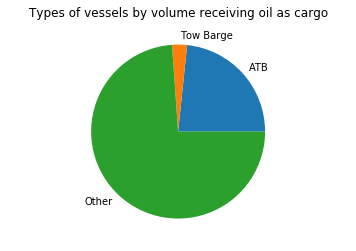

In [40]:
volume_export_byvessel = [oil_traffic['cargo']['atb_volume_export'], oil_traffic['cargo']['barge_volume_export'], oil_traffic['cargo']['other_export']]
#colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['ATB', 'Tow Barge','Other']
plt.gca().axis("equal")
plt.pie(volume_export_byvessel, labels= labels)
plt.title('Types of vessels by volume receiving oil as cargo')

(3333, 5)

### Add up volume transferred by fuel type 

In [39]:
# Add up the total volume of marine transport by product (this includes all transfers)
gas_export_data     = cargo_data[cargo_data['Product']=='GASOLINE']
gas_export_total = gas_export_data['TransferQtyInGallon'].sum()

diesel_export_data  = cargo_data[cargo_data['Product']=='DIESEL/MARINE GAS OIL']
diesel_export_total = diesel_export_data['TransferQtyInGallon'].sum()

bunker_export_data  = cargo_data[cargo_data['Product']=='BUNKER OIL/HFO']
bunker_export_total = bunker_export_data['TransferQtyInGallon'].sum()

jet_export_data   = cargo_data[cargo_data['Product']=='JET FUEL/KEROSENE']
jet_export_total  = jet_export_data['TransferQtyInGallon'].sum()

ulsd_export_data  = cargo_data[cargo_data['Product']=='DIESEL LOW SULPHUR (ULSD)']
ulsd_export_total = ulsd_export_data['TransferQtyInGallon'].sum()

crude_export_data  = cargo_data[cargo_data['Product'].str.contains('CRUDE')]
crude_export_total = crude_export_data['TransferQtyInGallon'].sum()

Other_fuel_total = cargo_data['TransferQtyInGallon'].sum() - crude_export_total - ulsd_export_total - jet_export_total - bunker_export_total - diesel_export_total - gas_export_total 

### Plot up results

Text(0.5,1,'Marine Oil Export from WA Refineries and Terminals')

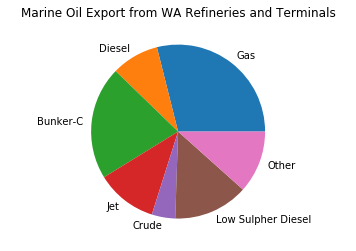

In [53]:
oil_export_values = [gas_export_total, diesel_export_total , bunker_export_total, jet_export_total, crude_export_total, ulsd_export_total, Other_fuel_total]
#colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['Gas', 'Diesel', 'Bunker-C', 'Jet', 'Crude', 'Low Sulpher Diesel', 'Other']
plt.gca().axis("equal")
plt.pie(oil_export_values, labels= labels)
plt.title('Marine Oil Export from WA Refineries and Terminals')

In [27]:
oil_traffic['destination']

{'GLOBAL PILOT': 0,
 'Phillips 66 Ferndale Refinery': 0,
 'NATHAN SCHMIDT': 0,
 'BP Cherry Point Refinery': 0,
 'SeaPort Sound Terminal': 0,
 'Shell Oil LP Seattle Distribution Terminal': 0,
 'ATB BARGE KIRBY 185-01': 0,
 'CARTAGENA': 0,
 'PROFESSOR KAREN ANN BROWN': 0,
 'ATB BARGE 550-2': 0,
 'ATB BARGE FIGHT FANCONI ANEMIA': 0,
 'Tidewater Snake River Terminal': 0,
 'NEW ENDEAVOR': 0,
 'Phillips 66 Tacoma Terminal': 0,
 'HMS 2000': 0,
 'Andeavor Anacortes Refinery (formerly Tesoro)': 0,
 'YON-319': 0,
 'Naval Air Station Whidbey Island (NASWI)': 0,
 'DR. BONNIE W. RAMSEY': 0,
 'COMMENCEMENT BAY': 0,
 'WEBB MOFFETT': 0,
 'BETSY ARNTZ': 0,
 'PB-34': 0,
 'EXPLORER': 0,
 'GAN-TRIUMPH': 0,
 'SHAUNA KAY': 0,
 'DUGAN PEARSALL': 0,
 'DOTTIE': 0,
 'KIRKEHOLMEN': 0,
 'ATB BARGE 650-10': 0,
 'Alon Asphalt Company (Paramount Petroleum)': 0,
 'Tidewater Umatilla Terminal': 0,
 'TORM EMILIE': 0,
 'PELICAN STATE': 0,
 'Shell Puget Sound Refinery': 0,
 'Tesoro Port Angeles Terminal': 0,
 'U.S. Oil &